In [9]:
import numpy as np
import pandas as pd

# Transform raw counts data to obtain log2FC values for both comparisons.

In [14]:
raw_counts = pd.read_table("/Users/MOON/Documents/summer_utra_2020/CRISPR8500_TRM9L/data/gene_read_counts_htseq_table_withw1118Rep1_final.tsv")

In [15]:
raw_counts.head()

,GeneID,w1118_Rep1,w1118_Rep2,w1118_Rep3,CRISPR8500_Rep1,CRISPR8500_Rep2,CRISPR8500_Rep3,CRISPRTRM9L_Rep1,CRISPRTRM9L_Rep2,CRISPRTRM9L_Rep3
0,FBgn0000003,0,0,0,0,2,1,0,0,0
1,FBgn0000008,218,377,377,463,454,255,298,291,365
2,FBgn0000014,23,16,16,25,38,37,77,19,31
3,FBgn0000015,26,6,6,13,50,49,70,17,41
4,FBgn0000017,675,1391,1391,1725,1733,1178,1434,1765,1996


In [16]:
# Filter out genes that have 0 for w1118_Rep1/w1118_Rep2/Rep3.

raw_counts = raw_counts[(raw_counts['w1118_Rep2'] != 0) & (raw_counts['w1118_Rep3'] != 0) & (raw_counts['w1118_Rep1'] != 0)]
raw_counts.head()

,GeneID,w1118_Rep1,w1118_Rep2,w1118_Rep3,CRISPR8500_Rep1,CRISPR8500_Rep2,CRISPR8500_Rep3,CRISPRTRM9L_Rep1,CRISPRTRM9L_Rep2,CRISPRTRM9L_Rep3
1,FBgn0000008,218,377,377,463,454,255,298,291,365
2,FBgn0000014,23,16,16,25,38,37,77,19,31
3,FBgn0000015,26,6,6,13,50,49,70,17,41
4,FBgn0000017,675,1391,1391,1725,1733,1178,1434,1765,1996
5,FBgn0000018,51,60,60,95,116,91,72,98,91


In [17]:
# Calculate log2_FC values for CRISPR8500 and CRISPRTRM9L

# FOR CRISPR8500:
raw_counts = raw_counts.copy()
raw_counts.loc[:,'log2_FC_CRISPR8500'] = raw_counts.apply(
    (lambda gene: (((
                    gene["CRISPR8500_Rep1"]
                    + gene["CRISPR8500_Rep2"]
                    + gene["CRISPR8500_Rep3"])/ 3)
                    / 
                    ((gene["w1118_Rep2"] + gene["w1118_Rep3"] + gene['w1118_Rep1']) / 3))),
    axis=1)

# Take log2 of the entire column.
raw_counts.loc[:,'log2_FC_CRISPR8500'] = np.log2(raw_counts["log2_FC_CRISPR8500"])

/Users/MOON/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
# FOR CRISPRTRM9L:
raw_counts.loc[:,"log2_FC_CRISPRTRM9L"] = raw_counts.apply(
    (lambda gene: (((
                    gene["CRISPRTRM9L_Rep1"]
                    + gene["CRISPRTRM9L_Rep2"]
                    + gene["CRISPRTRM9L_Rep3"])/ 3)
                    / 
                    ((gene["w1118_Rep2"] + gene["w1118_Rep3"] + gene["w1118_Rep1"]) / 3))),
    axis=1)

# Take log2 of the entire column.
raw_counts.loc[:,"log2_FC_CRISPRTRM9L"] = np.log2(raw_counts["log2_FC_CRISPRTRM9L"])

In [19]:
final_counts = raw_counts[['GeneID','log2_FC_CRISPR8500','log2_FC_CRISPRTRM9L']]
final_counts.head()

,GeneID,log2_FC_CRISPR8500,log2_FC_CRISPRTRM9L
1,FBgn0000008,0.269944,-0.026967
2,FBgn0000014,0.862496,1.207325
3,FBgn0000015,1.559427,1.752072
4,FBgn0000017,0.423360,0.587603
5,FBgn0000018,0.820552,0.610053


# Assign gene names for the IDs in our counts data.

In [20]:
# Need to obtain gene name for the gene ID's in our data. 

crispr8500 = pd.read_table("/Users/MOON/Documents/summer_utra_2020/CRISPR8500_TRM9L/data/w1118_vs_CRISPR8500_log2fc.tsv")
trm9l = pd.read_table("/Users/MOON/Documents/summer_utra_2020/CRISPR8500_TRM9L/data/w1118_vs_CRISPRTRM9L_log2fc.tsv")

In [21]:
print(crispr8500.count(axis=1))
print('\n')
print(trm9l.count(axis=1))

0      8
1      8
2      8
3      8
4      8
      ..
743    8
744    8
745    8
746    8
747    8
Length: 748, dtype: int64


0       7
1       7
2       7
3       7
4       7
       ..
1204    7
1205    7
1206    7
1207    7
1208    7
Length: 1209, dtype: int64


In [22]:
# There are more gene IDs in the w1118 v. TRM9L file.
# Find overlapping genes in both counts file and w1118 v. TRM9L file.

count_ids = final_counts['GeneID']
trm9l_ids = trm9l['id']
bools = trm9l_ids.isin(count_ids)

trm9l['id'] = trm9l[bools]
new_trm9l = trm9l.dropna()
new_trm9l['id'].count()

936

In [23]:
# Now assign gene names using w1118 vs. TRM9L file to the ID's in the counts file.

final_trm9l = new_trm9l[['id','gene_name']]
final_trm9l

,id,gene_name
0,FBgn0013276,Hsp70Ab
1,FBgn0013275,Hsp70Aa
3,FBgn0001225,Hsp26
4,FBgn0013279,Hsp70Bc
5,FBgn0013278,Hsp70Bb
...,...,...
1202,FBgn0004181,Ebp
1204,FBgn0250815,Jon65Aiv
1205,FBgn0011694,EbpII
1206,FBgn0011669,Mst57Db


In [24]:
# Insert gene names into the counts table by merging the two tables.

final_counts.rename(columns={'GeneID':'id'}, inplace=True)
merged_counts = final_counts.merge(final_trm9l, how='inner')
merged_counts = merged_counts[['id','gene_name','log2_FC_CRISPR8500','log2_FC_CRISPRTRM9L']]

merged_counts.head()

/Users/MOON/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,gene_name,log2_FC_CRISPR8500,log2_FC_CRISPRTRM9L
0,FBgn0000042,Act5C,-0.001507,-0.114671
1,FBgn0000052,Pfas,0.335632,-0.532923
2,FBgn0000114,bru1,-0.013986,0.252095
3,FBgn0000120,Arr1,-0.026749,-0.096681
4,FBgn0000147,aurA,-0.339486,-0.561879


# Filter for cutoff log2FC values in our counts data.

In [25]:
# Set the cutoff as 2-fold change (either doubled or halved), based on these two articles.
# 1. https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1006613
# 2. https://www.sciencedirect.com/science/article/pii/S0888754319300382

In [26]:
# First filter log2FC values for CRISPR8500 and store in dataframe.
final_crispr8500 = merged_counts[(merged_counts['log2_FC_CRISPR8500'] > 1) | (merged_counts['log2_FC_CRISPR8500'] < -1)]
final_crispr8500.drop('log2_FC_CRISPRTRM9L', axis=1, inplace=True)


# Now filter for CRISPRTRM9L values and store in separate dataframe.
final_trm9l = merged_counts[(merged_counts['log2_FC_CRISPRTRM9L'] > 1) | (merged_counts['log2_FC_CRISPRTRM9L'] < -1)]
final_trm9l.drop('log2_FC_CRISPR8500', axis=1, inplace=True)

/Users/MOON/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
final_crispr8500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 15 to 924
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  150 non-null    object 
 1   gene_name           150 non-null    object 
 2   log2_FC_CRISPR8500  150 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.7+ KB


In [28]:
final_trm9l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 5 to 932
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   333 non-null    object 
 1   gene_name            333 non-null    object 
 2   log2_FC_CRISPRTRM9L  333 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.4+ KB


# Prepare Genewiz data to make comparisons with our datasets.

## First, work with Genewiz data for w1118 v. CRISPR8500.

In [29]:
genewiz_8500 = pd.read_excel("/Users/MOON/Documents/summer_utra_2020/CRISPR8500_TRM9L/data/combinedresults_w1118vs8500.xlsx")

In [30]:
genewiz_8500.head()

,Genewiz Results,Unnamed: 1,Unnamed: 2,Lab Results,Unnamed: 4,Unnamed: 5,All pvalues significant. Log values are inverse of each other,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,positive number/ <1 = higher in experimental
0,Gene name,log2FoldChange,NaN,Gene name,NaN,fc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CG3397,8.41965,NaN,CR45456,0.027591,0.019309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CG32581,7.85354,NaN,CR45457,0.031414,0.0220133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CR45377,7.29691,NaN,CG17005,0.043182,0.0303838,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TwdlF,7.05161,NaN,CG3397,0.057827,0.0408964,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
genewiz_8500.columns = genewiz_8500.iloc[0]
new_genewiz_8500 = genewiz_8500.iloc[:,[0,1]]
new_genewiz_8500

,Gene name,log2FoldChange
0,Gene name,log2FoldChange
1,CG3397,8.41965
2,CG32581,7.85354
3,CR45377,7.29691
4,TwdlF,7.05161
...,...,...
744,NaN,NaN
745,NaN,NaN
746,NaN,NaN
747,NaN,NaN


In [32]:
# Clean data (NA values).
cleaned_8500 = new_genewiz_8500.dropna(axis=0)
cleaned_8500.count()

0
Gene name         251
log2FoldChange    251
dtype: int64

In [33]:
# Look for gene names in Genewiz that are in our dataset.

ocg_names = final_crispr8500['gene_name']
genewiz_names = cleaned_8500['Gene name']
names_bool = genewiz_names.isin(ocg_names)
final_genewiz_8500 = cleaned_8500[names_bool]

final_genewiz_8500.describe()

,Gene name,log2FoldChange
count,26,26.000000
unique,26,26.000000
top,CG1791,-1.887004
freq,1,1.000000


## Now, work with Genewiz data for w1118 vs. CRISPR-TRM9L.

In [34]:
genewiz_trm9l = pd.read_excel("/Users/MOON/Documents/summer_utra_2020/CRISPR8500_TRM9L/data/combinedresults_w1118vsTRM9L.xlsx")

In [35]:
genewiz_trm9l.head()

,Genewiz,Unnamed: 1,Unnamed: 2,Lab,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Gene.name,log2FoldChange,NaN,gene_name,log2_fc,NaN,positive number/ <1 = higher in experimental
1,CR44057,-7.65495,NaN,Hsp70Ab,9.4672,NaN,NaN
2,Crg-1,-7.59033,NaN,Hsp70Aa,9.42951,NaN,NaN
3,CR43767,-7.07416,NaN,Hsp22,7.24338,NaN,NaN
4,Cyp6a17,-6.6365,NaN,Hsp26,6.74607,NaN,NaN


In [36]:
genewiz_trm9l.columns = genewiz_trm9l.loc[0]
new_genewiz_trm9l = genewiz_trm9l.iloc[1:,0:2]
new_genewiz_trm9l

,Gene.name,log2FoldChange
1,CR44057,-7.65495
2,Crg-1,-7.59033
3,CR43767,-7.07416
4,Cyp6a17,-6.6365
5,CR45791,-6.41987
...,...,...
1205,NaN,NaN
1206,NaN,NaN
1207,NaN,NaN
1208,NaN,NaN


In [37]:
# Clean data (NA values).
cleaned_trm9l = new_genewiz_trm9l.dropna(axis=0)
cleaned_trm9l.count()

0
Gene.name         188
log2FoldChange    188
dtype: int64

In [38]:
# Look for gene names in Genewiz that are in our dataset.

ocg_names = final_trm9l['gene_name']
genewiz_names = cleaned_trm9l['Gene.name']
names_bool = genewiz_names.isin(ocg_names)
final_genewiz_trm9l = cleaned_trm9l[names_bool]

final_genewiz_trm9l.describe()

,Gene.name,log2FoldChange
count,38,38.000000
unique,38,38.000000
top,Trissin,-1.389183
freq,1,1.000000


# Note: our pipeline produced more 'signficant' genes than Genewiz's pipeline. 

# Grab genes from James' file and filter our data and Genewiz data further to look at relevant genes.

In [41]:
synaptic_genes = pd.read_csv("/Users/MOON/Documents/summer_utra_2020/synaptic_gene_list.csv")

In [42]:
synaptic_genes.head()

,Gene,Gene name
0,FBgn0051665,wry
1,FBgn0004575,Syn
2,FBgn0031424,VGlut
3,FBgn0003386,Shaw
4,FBgn0051646,DIP-theta


In [43]:
synaptic_genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gene       454 non-null    object
 1   Gene name  454 non-null    object
dtypes: object(2)
memory usage: 7.2+ KB


In [44]:
synaptic_genes.nunique()

Gene         454
Gene name    448
dtype: int64

In [45]:
candidates = synaptic_genes['Gene name']

In [46]:
candidates.head()

0          wry
1          Syn
2        VGlut
3         Shaw
4    DIP-theta
Name: Gene name, dtype: object

# Look for genes that are in our data, Genewiz's data, AND James' data.


In [47]:
genewiz_8500_names = final_genewiz_8500['Gene name']
names_bool = genewiz_8500_names.isin(candidates)
names_bool[names_bool==True]

Series([], Name: Gene name, dtype: bool)

In [48]:
genewiz_trm9l_names = final_genewiz_trm9l['Gene.name']
names_bool = genewiz_trm9l_names.isin(candidates)
names_bool[names_bool==True]

Series([], Name: Gene.name, dtype: bool)

# Compare our data to Genewiz's data.

## First, prepare w1118 v. CRISPR8500 and w1118 v. CRISPRTRM9L datasets.

#### Working with w1118 v. CRISPR8500

In [49]:
# Merge our data and Genewiz's data into one dataframe.
final_genewiz_8500.rename(columns={'Gene name':'gene_name'},inplace=True)

merged_CRISPR8500 = final_crispr8500.merge(final_genewiz_8500, how='inner', left_on='gene_name', right_on='gene_name')

# Rename for clarity
merged_CRISPR8500.rename(columns={'log2_FC_CRISPR8500':'OCG_log2FC_CRISPR8500','log2FoldChange':'GW_log2FC_CRISPR8500'}, inplace=True)
merged_CRISPR8500.rename_axis('W1118_CRISPR8500', inplace=True)
merged_CRISPR8500.head()

/Users/MOON/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,gene_name,OCG_log2FC_CRISPR8500,GW_log2FC_CRISPR8500
W1118_CRISPR8500,,,,
0,FBgn0013277,Hsp70Ba,4.067904,4.44523
1,FBgn0015714,Cyp6a17,-2.377513,-2.48351
2,FBgn0019940,Rh6,3.095667,2.84592
3,FBgn0028396,TotA,2.698532,2.71304
4,FBgn0030163,CG1791,1.699046,1.51634


#### Working with w1118 v. CRISPRTRM9L

In [50]:
final_genewiz_trm9l.rename(columns={'Gene.name':'gene_name'}, inplace=True)

merged_TRM9L = final_trm9l.merge(final_genewiz_trm9l, how='inner', left_on='gene_name', right_on='gene_name')

# Rename for clarity 
merged_TRM9L.rename(columns={'log2_FC_CRISPRTRM9L':'OCG_log2FC_TRM9L','log2FoldChange':'GW_log2FC_TRM9L'}, inplace=True)
merged_TRM9L.rename_axis('W1118_CRISPRTRM9L', inplace=True)
merged_TRM9L.head()


/Users/MOON/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,gene_name,OCG_log2FC_TRM9L,GW_log2FC_TRM9L
W1118_CRISPRTRM9L,,,,
0,FBgn0002939,ninaD,1.702532,1.65431
1,FBgn0003250,Rh4,-1.371740,-1.38918
2,FBgn0015714,Cyp6a17,-9.437128,-6.6365
3,FBgn0019940,Rh6,2.381866,2.23879
4,FBgn0021738,Crg-1,-7.396605,-7.59033


## Second, compare log2_FC values for both datasets.

In [101]:
import seaborn as sns 

#### Comparisons for w1118 v. CRISPR8500

In [56]:
merged_CRISPR8500['OCG_log2FC_CRISPR8500'].astype('float64').corr(merged_CRISPR8500['GW_log2FC_CRISPR8500'].astype('float64'))

0.9902847896379401

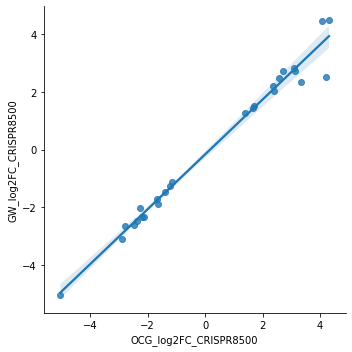

In [57]:
sns.lmplot(x='OCG_log2FC_CRISPR8500', y='GW_log2FC_CRISPR8500',
               palette='pastel', data=merged_CRISPR8500)

#### Comparisons for w1118 v. CRISPRTRM9L

In [58]:
merged_TRM9L['OCG_log2FC_TRM9L'].astype('float64').corr(merged_TRM9L['GW_log2FC_TRM9L'].astype('float64'))

0.9876732304272359

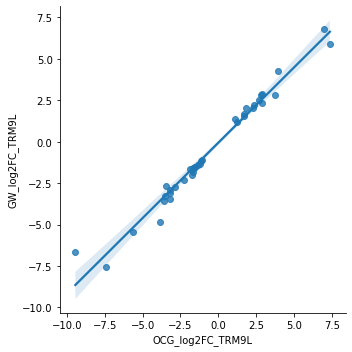

In [59]:
sns.lmplot(x='OCG_log2FC_TRM9L', y='GW_log2FC_TRM9L',
               palette='pastel', data=merged_TRM9L)

# Compare DESeq2 log2FC values from our data against Genewiz's data

#### Note: the Genewiz data is from the merged Genewiz and OCG dataframe (that was run through a different pipeline). Original Genewiz data only came with gene names. DESeq2 process was completed with R script (from OCG raw counts data).

In [59]:
import plotly.express as px

### Working with W1118 v. CRISPRTRM9L (with W1118_rep1)

In [51]:
deseq_crisprtrm9l = pd.read_csv("/Users/MOON/Documents/summer_utra_2020/CRISPR8500_TRM9L/DESeq2_CRISPRTRM9L_w1118/NEW_log2fc_deseq_TRM9L_w1118.csv")

In [52]:
deseq_crisprtrm9l = deseq_crisprtrm9l.drop('Unnamed: 0', axis=1)
deseq_crisprtrm9l.head()

,ID,log2FoldChange
0,FBgn0000003,NaN
1,FBgn0000008,-0.088167
2,FBgn0000014,1.190118
3,FBgn0000015,1.682087
4,FBgn0000017,0.524735


In [53]:
# Reminder: here's what the merged OCG (ran through a different pipeline) and Genewiz dataframe looks like.
merged_TRM9L.head()

,id,gene_name,OCG_log2FC_TRM9L,GW_log2FC_TRM9L
W1118_CRISPRTRM9L,,,,
0,FBgn0002939,ninaD,1.702532,1.65431
1,FBgn0003250,Rh4,-1.371740,-1.38918
2,FBgn0015714,Cyp6a17,-9.437128,-6.6365
3,FBgn0019940,Rh6,2.381866,2.23879
4,FBgn0021738,Crg-1,-7.396605,-7.59033


In [54]:
# Drop unnecessary columns (just need the id and log2FC for Genewiz).
genewiz_log2fc_trm9l = merged_TRM9L.drop(['gene_name','OCG_log2FC_TRM9L'], axis=1)
genewiz_log2fc_trm9l = genewiz_log2fc_trm9l.set_index('id')
genewiz_log2fc_trm9l.index.rename('ID', inplace=True)

genewiz_log2fc_trm9l.head()

,GW_log2FC_TRM9L
ID,
FBgn0002939,1.65431
FBgn0003250,-1.38918
FBgn0015714,-6.6365
FBgn0019940,2.23879
FBgn0021738,-7.59033


In [55]:
# Merge the two dataframes.
deseq2_gw_trm9l = genewiz_log2fc_trm9l.merge(deseq_crisprtrm9l, how='inner', on='ID')

deseq2_gw_trm9l.head()

,ID,GW_log2FC_TRM9L,log2FoldChange
0,FBgn0002939,1.65431,1.646287
1,FBgn0003250,-1.38918,-1.459741
2,FBgn0015714,-6.6365,-9.494595
3,FBgn0019940,2.23879,2.290028
4,FBgn0021738,-7.59033,-7.469869


In [56]:
# Rename columns and display resulting df.
deseq2_gw_trm9l = deseq2_gw_trm9l.rename({'GW_log2FC_TRM9L':'GW_log2FC', 'log2FoldChange': 'DESeq2_log2FC'}, axis=1)
deseq2_gw_trm9l

,ID,GW_log2FC,DESeq2_log2FC
0,FBgn0002939,1.65431,1.646287
1,FBgn0003250,-1.38918,-1.459741
2,FBgn0015714,-6.6365,-9.494595
3,FBgn0019940,2.23879,2.290028
4,FBgn0021738,-7.59033,-7.469869
5,FBgn0029833,-1.61555,-1.736792
6,FBgn0030163,1.17331,1.158310
7,FBgn0030332,2.0403,1.780062
8,FBgn0030830,-1.84926,-1.711060
9,FBgn0031435,-1.6631,-1.768981


In [108]:
# Change type to float 
deseq2_gw_trm9l['GW_log2FC'] = deseq2_gw_trm9l['GW_log2FC'].astype('float64')
deseq2_gw_trm9l['DESeq2_log2FC'] = deseq2_gw_trm9l['DESeq2_log2FC'].astype('float64')

In [57]:
deseq2_gw_trm9l['GW_log2FC'].astype('float64').corr(deseq2_gw_trm9l['DESeq2_log2FC'].astype('float64'))

0.9878580900200895

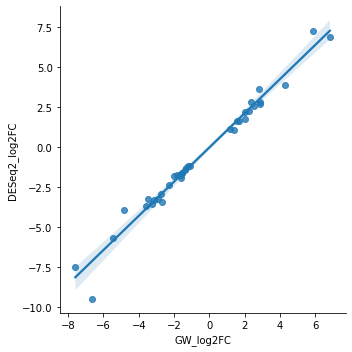

In [109]:
sns.lmplot(x='GW_log2FC', y='DESeq2_log2FC',
               palette='pastel', data=deseq2_gw_trm9l)

### Working with W1118 v. CRISPRTRM9L (sans W1118_Rep1)

In [85]:
deseq_crisprtrm9l_sans = pd.read_csv("/Users/MOON/Documents/summer_utra_2020/CRISPR8500_TRM9L/DESeq2_CRISPRTRM9L_w1118/log2fc_deseq_TRM9L_sansW1118rep1.csv")

In [86]:
deseq_crisprtrm9l_sans.head()

,Unnamed: 0,ID,log2FoldChange
0,FBgn0000003,FBgn0000003,NaN
1,FBgn0000008,FBgn0000008,-0.275407
2,FBgn0000014,FBgn0000014,1.442939
3,FBgn0000015,FBgn0000015,2.848556
4,FBgn0000017,FBgn0000017,0.280193


In [87]:
deseq_crisprtrm9l_sans = deseq_crisprtrm9l_sans.drop('Unnamed: 0', axis=1)
deseq_crisprtrm9l_sans.head()

,ID,log2FoldChange
0,FBgn0000003,NaN
1,FBgn0000008,-0.275407
2,FBgn0000014,1.442939
3,FBgn0000015,2.848556
4,FBgn0000017,0.280193


In [88]:
# Merge the two dataframes.
deseq2_gw_trm9l_sans = genewiz_log2fc_trm9l.merge(deseq_crisprtrm9l_sans, how='inner', on='ID')

deseq2_gw_trm9l_sans.head()

,ID,GW_log2FC_TRM9L,log2FoldChange
0,FBgn0002939,1.65431,1.268647
1,FBgn0003250,-1.38918,-1.277808
2,FBgn0015714,-6.6365,-9.791497
3,FBgn0019940,2.23879,2.580433
4,FBgn0021738,-7.59033,-7.469752


In [89]:
# Rename columns and display resulting df.
deseq2_gw_trm9l_sans = deseq2_gw_trm9l_sans.rename({'GW_log2FC_TRM9L':'GW_log2FC', 'log2FoldChange': 'DESeq2_log2FC'}, axis=1)
deseq2_gw_trm9l_sans

,ID,GW_log2FC,DESeq2_log2FC
0,FBgn0002939,1.65431,1.268647
1,FBgn0003250,-1.38918,-1.277808
2,FBgn0015714,-6.6365,-9.791497
3,FBgn0019940,2.23879,2.580433
4,FBgn0021738,-7.59033,-7.469752
5,FBgn0029833,-1.61555,-1.405366
6,FBgn0030163,1.17331,0.918828
7,FBgn0030332,2.0403,1.859634
8,FBgn0030830,-1.84926,-1.971642
9,FBgn0031435,-1.6631,-1.372591


In [90]:
deseq2_gw_trm9l_sans['GW_log2FC'].astype('float64').corr(deseq2_gw_trm9l_sans['DESeq2_log2FC'].astype('float64'))

0.9831124272355185

In [112]:
# Change type to float 
deseq2_gw_trm9l_sans['GW_log2FC'] = deseq2_gw_trm9l_sans['GW_log2FC'].astype('float64')
deseq2_gw_trm9l_sans['DESeq2_log2FC'] = deseq2_gw_trm9l_sans['DESeq2_log2FC'].astype('float64')

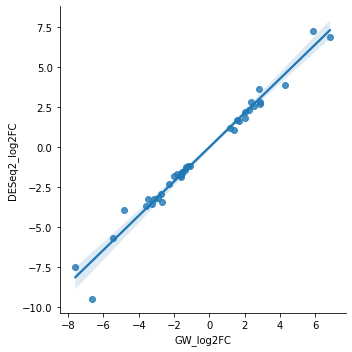

In [113]:
sns.lmplot(x='GW_log2FC', y='DESeq2_log2FC',
               palette='pastel', data=deseq2_gw_trm9l_sans)

### Working with W1118 v. CRISPR8500 (with W1118_Rep1)

In [92]:
deseq_crispr8500 = pd.read_csv("/Users/MOON/Documents/summer_utra_2020/CRISPR8500_TRM9L/DESeq2_CRISPR8500_w1118/log2fc_deseq_8500_w1118.csv")

In [93]:
deseq_crispr8500 = deseq_crispr8500.drop('Unnamed: 0', axis=1)
deseq_crispr8500.head()

,ID,log2FoldChange
0,FBgn0000003,2.273041
1,FBgn0000008,0.127808
2,FBgn0000014,0.717724
3,FBgn0000015,1.373492
4,FBgn0000017,0.295528


In [94]:
# Reminder: here's what the merged OCG (ran through a different pipeline) and Genewiz dataframe looks like.
merged_CRISPR8500.head()

,id,gene_name,OCG_log2FC_CRISPR8500,GW_log2FC_CRISPR8500
W1118_CRISPR8500,,,,
0,FBgn0013277,Hsp70Ba,4.067904,4.44523
1,FBgn0015714,Cyp6a17,-2.377513,-2.48351
2,FBgn0019940,Rh6,3.095667,2.84592
3,FBgn0028396,TotA,2.698532,2.71304
4,FBgn0030163,CG1791,1.699046,1.51634


In [95]:
# Drop unnecessary columns (just need the id and log2FC for Genewiz).
genewiz_log2fc_8500 = merged_CRISPR8500.drop(['gene_name','OCG_log2FC_CRISPR8500'], axis=1)
genewiz_log2fc_8500 = genewiz_log2fc_8500.set_index('id')
genewiz_log2fc_8500.index.rename('ID', inplace=True)

genewiz_log2fc_8500.head()

,GW_log2FC_CRISPR8500
ID,
FBgn0013277,4.44523
FBgn0015714,-2.48351
FBgn0019940,2.84592
FBgn0028396,2.71304
FBgn0030163,1.51634


In [96]:
# Merge the two dataframes.
deseq2_gw_8500 = genewiz_log2fc_8500.merge(deseq_crispr8500, how='inner', on='ID')

deseq2_gw_8500.head()

,ID,GW_log2FC_CRISPR8500,log2FoldChange
0,FBgn0013277,4.44523,3.885061
1,FBgn0015714,-2.48351,-2.529794
2,FBgn0019940,2.84592,2.948037
3,FBgn0028396,2.71304,2.583636
4,FBgn0030163,1.51634,1.570339


In [97]:
# Rename columns and display resulting df.
deseq2_gw_8500 = deseq2_gw_8500.rename({'GW_log2FC_CRISPR8500':'GW_log2FC', 'log2FoldChange': 'DESeq2_log2FC'}, axis=1)
deseq2_gw_8500

,ID,GW_log2FC,DESeq2_log2FC
0,FBgn0013277,4.44523,3.885061
1,FBgn0015714,-2.48351,-2.529794
2,FBgn0019940,2.84592,2.948037
3,FBgn0028396,2.71304,2.583636
4,FBgn0030163,1.51634,1.570339
5,FBgn0030830,-2.61504,-2.512227
6,FBgn0031435,1.25624,1.206425
7,FBgn0033395,2.53323,4.002947
8,FBgn0033980,2.4863,2.432156
9,FBgn0034128,2.20016,2.238239


In [98]:
deseq2_gw_8500['GW_log2FC'].astype('float64').corr(deseq2_gw_8500['DESeq2_log2FC'].astype('float64'))

0.9904143388704089

In [114]:
# Change type to float 
deseq2_gw_8500['GW_log2FC'] = deseq2_gw_8500['GW_log2FC'].astype('float64')
deseq2_gw_8500['DESeq2_log2FC'] = deseq2_gw_8500['DESeq2_log2FC'].astype('float64')

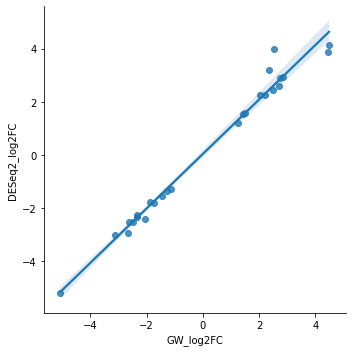

In [115]:
sns.lmplot(x='GW_log2FC', y='DESeq2_log2FC',
               palette='pastel', data=deseq2_gw_8500)

### Working with W1118 v. CRISPR8500 (without W1118_Rep1)

In [118]:
deseq_crispr8500_sans = pd.read_csv("/Users/MOON/Documents/summer_utra_2020/CRISPR8500_TRM9L/DESeq2_CRISPR8500_w1118/log2fc_deseq_8500_sansW1118rep1.csv")

In [119]:
deseq_crispr8500_sans = deseq_crispr8500_sans.drop('Unnamed: 0', axis=1)
deseq_crispr8500_sans.head()

,ID,log2FoldChange
0,FBgn0000003,2.333755
1,FBgn0000008,-0.054263
2,FBgn0000014,0.981827
3,FBgn0000015,2.568316
4,FBgn0000017,0.054371


In [120]:
# Merge the two dataframes.
deseq2_gw_8500_sans = genewiz_log2fc_8500.merge(deseq_crispr8500_sans, how='inner', on='ID')

deseq2_gw_8500_sans.head()

,ID,GW_log2FC_CRISPR8500,log2FoldChange
0,FBgn0013277,4.44523,3.353409
1,FBgn0015714,-2.48351,-2.832683
2,FBgn0019940,2.84592,3.254520
3,FBgn0028396,2.71304,2.455336
4,FBgn0030163,1.51634,1.333611


In [121]:
# Rename columns and display resulting df.
deseq2_gw_8500_sans = deseq2_gw_8500_sans.rename({'GW_log2FC_CRISPR8500':'GW_log2FC', 'log2FoldChange': 'DESeq2_log2FC'}, axis=1)
deseq2_gw_8500_sans

,ID,GW_log2FC,DESeq2_log2FC
0,FBgn0013277,4.44523,3.353409
1,FBgn0015714,-2.48351,-2.832683
2,FBgn0019940,2.84592,3.254520
3,FBgn0028396,2.71304,2.455336
4,FBgn0030163,1.51634,1.333611
5,FBgn0030830,-2.61504,-2.768883
6,FBgn0031435,1.25624,1.621697
7,FBgn0033395,2.53323,5.091478
8,FBgn0033980,2.4863,2.182078
9,FBgn0034128,2.20016,2.052489


In [122]:
deseq2_gw_8500_sans['GW_log2FC'].astype('float64').corr(deseq2_gw_8500_sans['DESeq2_log2FC'].astype('float64'))

0.974367880614785

In [123]:
# Change type to float 
deseq2_gw_8500_sans['GW_log2FC'] = deseq2_gw_8500_sans['GW_log2FC'].astype('float64')
deseq2_gw_8500_sans['DESeq2_log2FC'] = deseq2_gw_8500_sans['DESeq2_log2FC'].astype('float64')

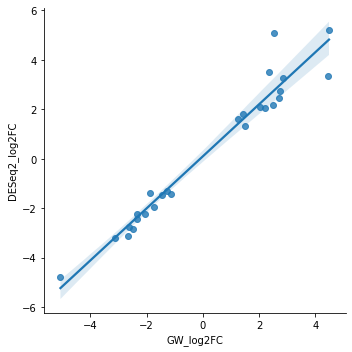

In [124]:
sns.lmplot(x='GW_log2FC', y='DESeq2_log2FC',
               palette='pastel', data=deseq2_gw_8500_sans)